In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from sklearn import metrics

In [2]:
d = {0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankleboot'}

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

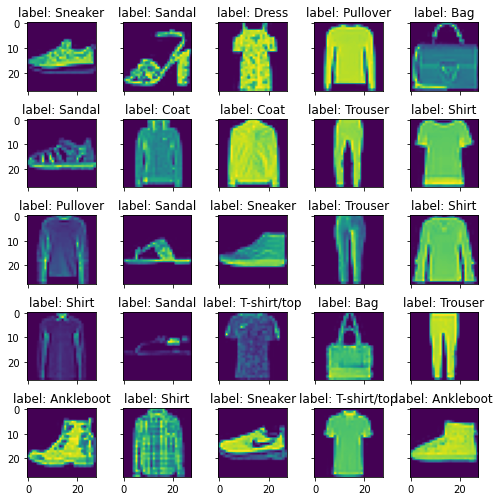

In [4]:
fig, axes = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(7,7))
plt.tight_layout()
for i, ax in enumerate(axes.flatten()):
    j = np.random.randint(0, len(x_train))
    ax.imshow(x_train[j])
    ax.set_title(f'label: {d[y_train[j]]}')
    
plt.show()

In [5]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

In [8]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(4, 4),
                 input_shape=(28, 28, 1),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
with tf.device("/device:GPU:0"):
    model.fit(x_train,
              y_cat_train,
              epochs=15,
              validation_data=(x_test, y_cat_test),
              callbacks=[early_stop])

Epoch 1/15


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv2d/Conv2D (defined at <ipython-input-9-787d62642224>:3) ]] [Op:__inference_train_function_712]

Function call stack:
train_function


In [ ]:
model_perf = pd.DataFrame(model.history.history)
model_perf

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

model_perf[['accuracy','val_accuracy']].plot(ax=axes[0])
model_perf[['loss','val_loss']].plot(ax=axes[1])

In [ ]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
print(metrics.classification_report(y_test,predictions))

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(y_test,predictions), cmap='viridis')

In [ ]:
fig, axes = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(11,11))

for _, ax in enumerate(axes.flatten()):
    i = np.random.randint(0, len(x_test))
    pred_num = np.argmax(model.predict(x_test[i].reshape(1, 28, 28, 1)), axis=-1)
#     pred_num = model.predict_classes()
    ax.imshow(x_test[i].reshape(28, 28))
    ax.set_title(f'Pred: {d[pred_num[0]]},\ntrue: {d[y_test[i]]}')
plt.tight_layout()   
plt.show()